In [1]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn import svm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('ml_data_variable.csv')

# extract the independent variables (X) and dependent variable (y)
X = data[['COAL, Thousand Short Tons', 'NATURALGAS, Billion Cubic Feet', 'ELECTRICITY, Million Kilowatthours',
          'PETRO_INDUSTRIAL, Thousand Barrels per Day', 'PETRO_RESIDENTIAL, Thousand Barrels per Day',
          'PETRO_COMMERCIAL, Thousand Barrels per Day', 'PETRO_TRANSPORTATION, Thousand Barrels per Day',
          'PETRO_ELECTRICPOWER, Thousand Barrels per Day']]

y = data['CO2, Million Metric Tons']

# Shuffle data
X, y = shuffle(X, y, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


R² (Training): 0.347208661531506
###########################################################################
R²: 0.34
Mean Absolute Error: 34.03
Mean Squared Error: 1776.35
Root Mean Squared Error: 42.15


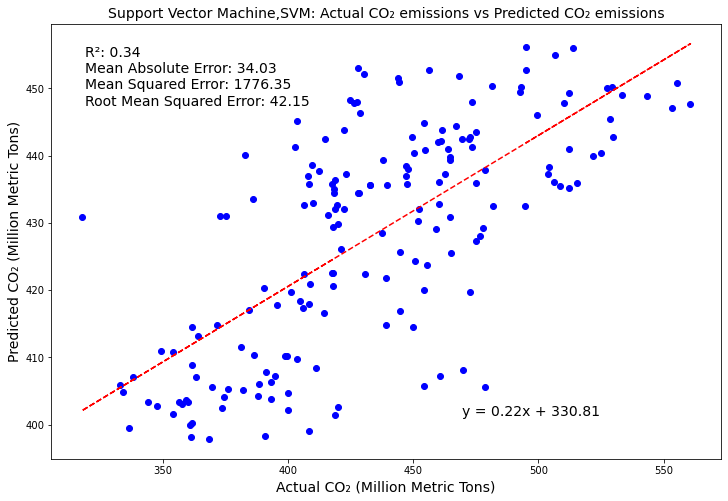

"\nOverfitting: SVM models are prone to overfitting, especially when the data is noisy or when the number of features is high compared to the number of samples. Overfitting can lead to poor generalization and low R2 values. Regularization techniques such as adjusting the regularization parameter (C) or using techniques like cross-validation can help mitigate overfitting.\n\nIncorrect Model Parameters: The performance of an SVM model can be sensitive to the choice of hyperparameters such as the kernel type, regularization parameter (C), and kernel coefficient (gamma). Suboptimal parameter settings can result in poor model performance and low R2 values. It is important to carefully tune the hyperparameters to find the optimal configuration for your data.\n\nOutliers or Noise: Outliers or noisy data points can adversely affect the performance of an SVM model. Consider identifying and handling outliers appropriately, either by removing them or applying outlier treatment techniques, to impr

In [3]:

# Create and train the SVM regressor
regressor = svm.SVR()
regressor.fit(X_train, y_train)

# Make predictions on the training data
y_pred_train = regressor.predict(X_train)

# Calculate the R-squared score for the training data
r2_train = r2_score(y_train, y_pred_train)
print("R² (Training):", r2_train)

print('###########################################################################')

# Predict the target variable for the test data
y_pred = regressor.predict(X_test)


# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print results
print("R²:", format(r2, ".2f"))
print("Mean Absolute Error:", format(mae, ".2f"))
print("Mean Squared Error:", format(mse, ".2f"))
print("Root Mean Squared Error:", format(rmse, ".2f"))

# Calculate statistical parameters
correlation = np.corrcoef(y_test, y_pred)[0, 1]
r_squared = np.square(correlation)

# Perform linear regression to get the line equation
slope, intercept = np.polyfit(y_test, y_pred, 1)

# Add the equation as text on the plot
equation = f'y = {slope:.2f}x + {intercept:.2f}'

# Fit a linear regression line
trendline = np.polyfit(y_test, y_pred, 1)
trendline_fn = np.poly1d(trendline)

plt.figure(figsize=(12, 8))  # Specify the width and height in inches

# Plot Actual vs Predicted values with trend line
plt.scatter(y_test, y_pred, color='blue')
plt.plot(y_test, trendline_fn(y_test), color='red', linestyle='--')
plt.xlabel('Actual CO₂ (Million Metric Tons)', fontsize=14)
plt.ylabel('Predicted CO₂ (Million Metric Tons)', fontsize=14)
plt.title('Support Vector Machine,SVM: Actual CO₂ emissions vs Predicted CO₂ emissions', fontsize=14)

# Annotate statistical parameters on the plot
#textstr = f'Correlation coefficient: {correlation:.2f}\nR-squared: {r_squared:.2f}'
textstr = f'R²: {format(r2, ".2f")}\nMean Absolute Error: {format(mae, ".2f")}\nMean Squared Error: {format(mse, ".2f")}\nRoot Mean Squared Error: {format(rmse, ".2f")}'
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, verticalalignment='top', fontsize=14)
plt.text(0.6, 0.2, equation, transform=plt.gcf().transFigure, fontsize=14)
plt.savefig('Support Vector Machine Actual CO₂ emissions vs Predicted CO₂ emissions.jpg')
plt.show()

'''
Overfitting: SVM models are prone to overfitting, especially when the data is noisy or when the number of features is high compared to the number of samples. Overfitting can lead to poor generalization and low R2 values. Regularization techniques such as adjusting the regularization parameter (C) or using techniques like cross-validation can help mitigate overfitting.

Incorrect Model Parameters: The performance of an SVM model can be sensitive to the choice of hyperparameters such as the kernel type, regularization parameter (C), and kernel coefficient (gamma). Suboptimal parameter settings can result in poor model performance and low R2 values. It is important to carefully tune the hyperparameters to find the optimal configuration for your data.

Outliers or Noise: Outliers or noisy data points can adversely affect the performance of an SVM model. Consider identifying and handling outliers appropriately, either by removing them or applying outlier treatment techniques, to improve the R2 value.

Insufficient Data: SVM models may require a relatively large amount of data to generalize well. If you have a small dataset, the model may struggle to capture the underlying patterns accurately. Gathering more data or using techniques such as data augmentation can help address this issue.

Data Scaling: SVM models are sensitive to the scale of the features. If the features have different scales, it can impact the model's performance and R2 value. Consider applying feature scaling techniques, such as standardization or normalization, to ensure that all features are on a similar scale.

'''

In [4]:
# Perform 5-fold cross-validation and get the R-squared scores
cv_scores = cross_val_score(regressor, X_train, y_train, cv=5, scoring='r2')

# Print the R-squared scores for each fold
print("Cross-Validation R² Scores:", cv_scores)

# Calculate the mean R-squared score
mean_r2 = np.mean(cv_scores)
print("Mean R² Score:", mean_r2)

# Fit the regressor to the training data
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print("R²:", format(r2, ".2f"))
print("Mean Absolute Error:", format(mae, ".2f"))
print("Mean Squared Error:", format(mse, ".2f"))
print("Root Mean Squared Error:", format(rmse, ".2f"))

# Perform 5-fold cross-validation and calculate MSE for each fold
mse_cv_scores = -cross_val_score(regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Cross-Validation MSE Scores:", mse_cv_scores)

print("Mean MSE:", format(sum(mse_cv_scores)/5, ".2f"))


Cross-Validation R² Scores: [0.2404808  0.22320715 0.32672321 0.34362142 0.37418866]
Mean R² Score: 0.3016442449361203
R²: 0.34
Mean Absolute Error: 34.03
Mean Squared Error: 1776.35
Root Mean Squared Error: 42.15
Cross-Validation MSE Scores: [1787.93831837 1779.9453305  1574.06490843 1493.03724792 1444.59024798]
Mean MSE: 1615.92


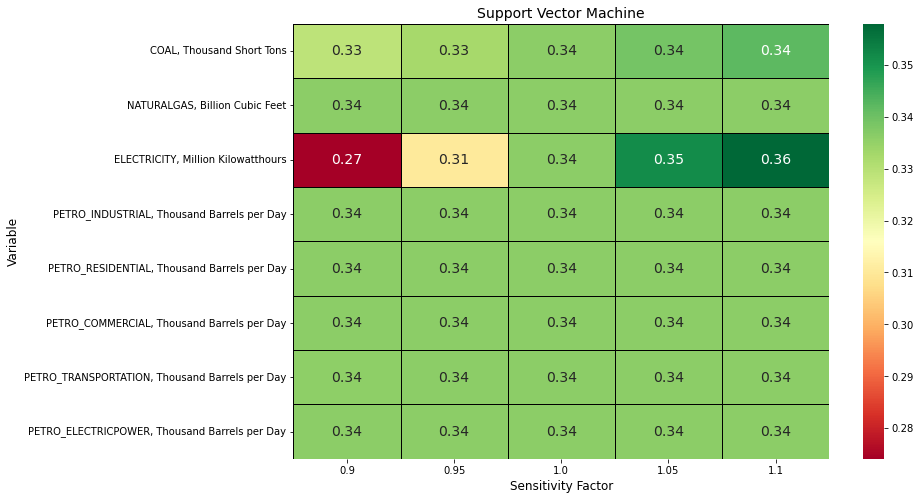

In [5]:
# Define the variables to analyze for sensitivity
variables_to_analyze = ['COAL, Thousand Short Tons', 'NATURALGAS, Billion Cubic Feet', 'ELECTRICITY, Million Kilowatthours',
                        'PETRO_INDUSTRIAL, Thousand Barrels per Day', 'PETRO_RESIDENTIAL, Thousand Barrels per Day',
                        'PETRO_COMMERCIAL, Thousand Barrels per Day', 'PETRO_TRANSPORTATION, Thousand Barrels per Day',
                        'PETRO_ELECTRICPOWER, Thousand Barrels per Day']


# Initialize a dictionary to store sensitivity analysis results
sensitivity_results = {}

# Iterate over the variables for sensitivity analysis
for variable_name in variables_to_analyze:
    # Get the original values of the selected variable
    original_values = X_test[variable_name].copy()

    # Initialize a list to store sensitivity analysis results for the current variable
    variable_sensitivity_results = []

    # Iterate over different sensitivities (e.g., increase by 10%)
    for sensitivity in [0.9, 0.95, 1.0, 1.05, 1.1]:
        # Modify the values of the selected variable
        modified_values = original_values * sensitivity
        X_test_modified = X_test.copy()
        X_test_modified[variable_name] = modified_values

        # Make predictions using the modified dataset
        y_pred_modified = regressor.predict(X_test_modified)

        # Calculate the R-squared score for the modified predictions
        r2_modified = r2_score(y_test, y_pred_modified)

        # Store the sensitivity analysis results
        variable_sensitivity_results.append(r2_modified)

    # Store the sensitivity analysis results for the current variable in the dictionary
    sensitivity_results[variable_name] = variable_sensitivity_results

# Create a matrix of sensitivity analysis results
sensitivity_matrix = np.array([sensitivity_results[variable] for variable in variables_to_analyze])

# Create a heatmap to visualize the sensitivity analysis results
plt.figure(figsize=(12, 8))  # Adjust the figure size if needed

sns.heatmap(sensitivity_matrix, cmap='RdYlGn', annot=True, fmt='.2f', annot_kws={'fontsize': 14},
            xticklabels=[0.9, 0.95, 1.0, 1.05, 1.1], yticklabels=variables_to_analyze,
            linewidths=0.5, linecolor='black')

plt.xlabel('Sensitivity Factor', fontsize=12)
plt.ylabel('Variable', fontsize=12)
plt.title('Support Vector Machine', fontsize=14)
plt.savefig('Support Vector Machine Sensitivity Analysis.jpg', dpi=300, bbox_inches='tight')
'Sensitivity Analysis of different machine learning methods: Changes in the R² when the selected variable is perturbed'
plt.show()
